In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import qgrid

In [ ]:
#!pip install html5lib
# Data address: http://data.tainan.gov.tw/dataset/dengue-dist/resource/9830c8ee-d5bb-4d9e-bb47-4f27c7c0fb5c

In [2]:
file='data/20151006-en.csv'
dfs1 = pd.DataFrame.from_csv(file,index_col=0)

In [27]:
dfs1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1222 entries, 2012-06-01 to 2015-10-05
Data columns (total 31 columns):
測站氣壓(hPa)StnPres                   1222 non-null float64
海平面氣壓(hPa)SeaPres                  1222 non-null float64
測站最高氣壓(hPa)StnPresMax              1222 non-null float64
測站最高氣壓時間(LST)StnPresMaxTime        1222 non-null object
測站最低氣壓(hPa)StnPresMin              1222 non-null float64
測站最低氣壓時間(LST)StnPresMinTime        1222 non-null object
Temperature                        1222 non-null float64
最高氣溫(℃)T Max                       1222 non-null object
最高氣溫時間(LST)T Max Time              1221 non-null object
最低氣溫(℃)T Min                       1222 non-null object
最低氣溫時間(LST)T Min Time              1221 non-null object
露點溫度(℃)Td dew point                1222 non-null float64
相對溼度(%)RH                          1222 non-null int64
最小相對溼度(%)RHMin                     1222 non-null object
最小相對溼度時間(LST)RHMinTime             1215 non-null object
風速(m/s)WS                     

In [3]:
dfs2=dfs1[['Temperature']]
dfs2[944:945]

,Temperature
date,
2015-01-01,16.1


In [4]:
dfs3=dfs2[944:]

In [5]:
qgrid.show_grid(dfs3)

In [6]:
df = pd.DataFrame.from_csv('data/1018-en.csv',index_col=0,parse_dates=[0])

df['date']=pd.to_datetime(df['date'])
df['num']=1

In [7]:
cases=df[['date','num']]
cases_group = cases.groupby('date');
cases_totals = cases_group.sum()

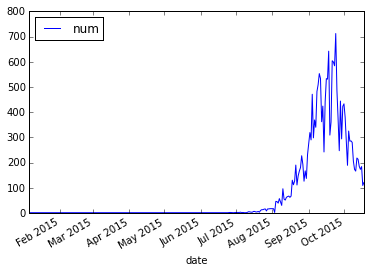

In [44]:
my_plot = cases_totals.plot()

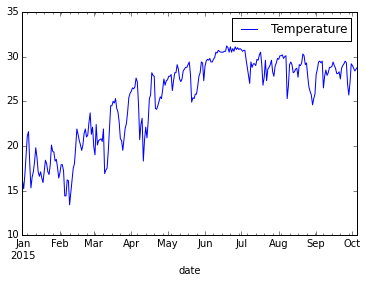

In [8]:
my_plot2=dfs3.plot()

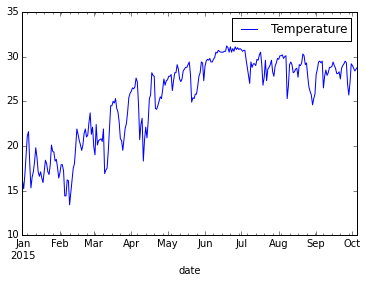

In [8]:
my_plot2=dfs3.plot()

In [29]:
dfs3_m = pd.rolling_mean(dfs3, 10)
len(dfs3),len(dfs3_m)

(278, 278)

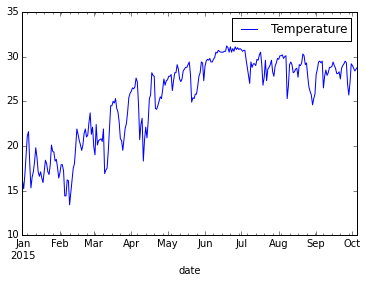

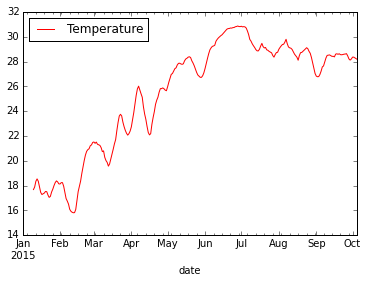

In [30]:
dfs3.plot(label='Temperature')
dfs3_m.plot(style='red',label="Average Temperature")

In [67]:
cases_totals[-14:-13],cases_totals[:1]

(            num
 date           
 2015-10-05  325,             num
 date           
 2015-01-06    1)

In [66]:
dfs3[-1:],dfs3[5:6]

(            Temperature
 date                   
 2015-10-05         28.8,             Temperature
 date                   
 2015-01-06         21.6)

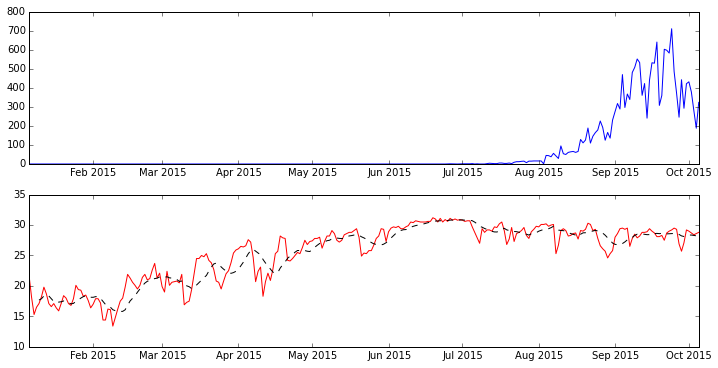

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(cases_totals.index[:-13],cases_totals[:-13])
plt.subplot(2, 1, 2)
plt.plot(dfs3.index[5:],dfs3[5:]['Temperature'],'r',dfs3_m.index[5:],dfs3_m[5:]['Temperature'],'k--')

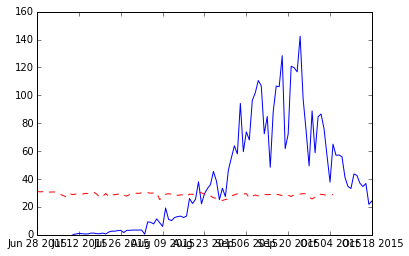

In [59]:
n=100
plt.plot(cases_totals.index[-n:],cases_totals[-n:]/5.,dfs3.index[-n:],dfs3[-n:]['Temperature'],'r--')

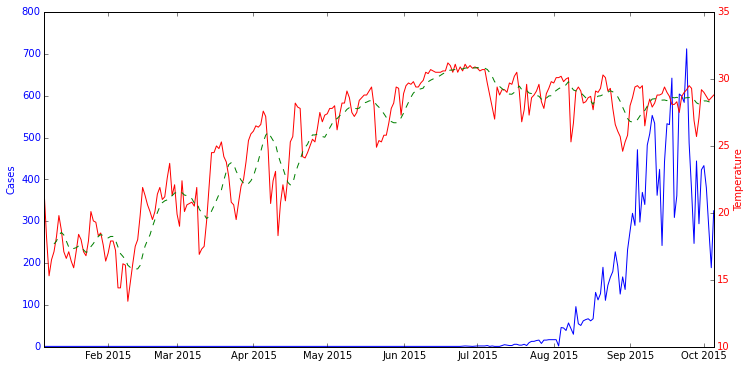

In [42]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cases_totals.index[:-13],cases_totals[:-13], 'b-')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Cases', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()

ax2.plot(dfs3.index[5:],dfs3[5:]['Temperature'], 'r')
ax2.plot(dfs3_m.index[5:],dfs3_m[5:]['Temperature'], 'g--')


ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [33]:
?pd.rolling_mean